# Termodinámica

## Descripción
En este experimento se estudia la transferencia de calor entre tres sistemas. La figura 1 muestra el esquema del experimento.

![Esquema](/home/pablo/jupyternotebooks/Termo/Experimento.png)

Se trata de dos vasos de precipitados colocados de forma concéntrica. En el vaso interior se agrega agua caliente y en el exterior se agrega agua fría.

El objetivo de la experiencia es determinar los coeficientes de transferencia de calor entre los vasos y de estos al ambiente.

![Diagrama](~/jupyternotebooks/Termo/Diagrama.png)

La temperatura inicial del vaso interior es 66°C y la del vaso exterior es 15°C. La temperatura ambiente es 22°C. Las temperaturas de cada vaso se registran cada 30 segundos utilizando un termómetro de mercurio con precisión de 1°C.

## Resultados

In [1]:
T1e=[66 60 57 54 51 48 45 44 43 41 40 40 39 38 38 37 37 37 36 36 36 36 36 36 35 35 35  35 35 35 35 34 34 34 34 34 34 34 34 34 33 33 33 33 33 33 33 33 33 33 32 32 32 32 32 32 32];
T2e=[15 18 22 24 27 28 29 31 31 32 33 33 33 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 33 33 33 33 33 33 33 33 33 33 32 32 32 32 32 32 32 32 32 32 31 31];

t = [0:numel(T1e)-1]*30;

El sistema de ecuaciones diferenciales se resuelve mediante integración numérica. Los coeficientes *k* de intercambio de calor del sistema se estiman en forma iterativa buscando que la solución se ajuste lo mejor posible a los datos.

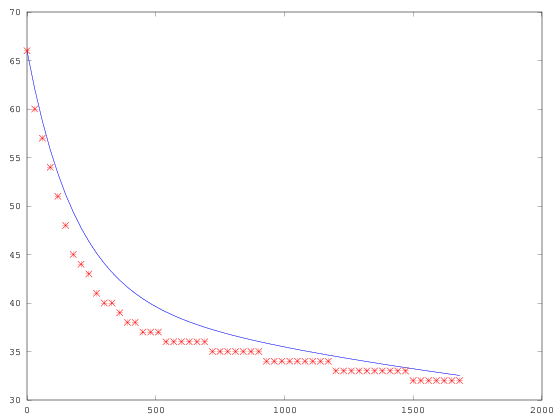

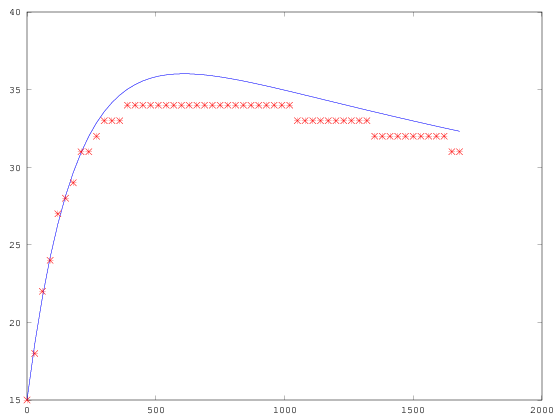

In [2]:
function Tdot = y(T, t)
  Ta = 22;
  k21 = 0.0025;
  ka1 = 0.0003;
  ka2 = 0.0004;
  
  Tdot(1) = k21*(T(2) - T(1)) + ka1*(Ta - T(1));
  Tdot(2) = k21*(T(1) - T(2)) + ka2*(Ta - T(2));
endfunction

%t = linspace(0,300, 300);
T0 = [66, 15];
Tt = lsode("y", T0, t);

figure(1)
plot(t, Tt(:,1), "-b")
hold on
plot(t, T1e, "*r")
hold off

figure(2)
plot(t, Tt(:,2), "-b")
hold on
plot(t, T2e, "*r")
hold off